In [2]:
# PROBLEM STATEMENT
# The COVID-19 pandemic caused a sharp rise in unemployment, affecting economies worldwide. 
# This project aims to analyze the factors contributing to this increase and build predictive models to forecast future unemployment trends. 
# By examining labor force data, policies, and industry disruptions, the goal is to provide insights that can help mitigate future unemployment spikes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\Sarav\OneDrive\Desktop\unemployment dataset\Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN

In [8]:
df.shape

(768, 7)

In [9]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
df.isnull() # IT CHECKS FOR MISSING VALUES

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [13]:
df.isnull().sum() # THERE ARE MISSING VALUES

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [23]:
df.dropna(inplace=True) # NULL VALUES ARE DELETED
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [24]:
df.shape

(740, 7)

In [25]:
df = df.rename(columns={'Region':'Region', ' Date':'Date', ' Frequency':'Frequency', ' Estimated Unemployment Rate (%)': 'Est_Unemp_Rate',
       ' Estimated Employed':'Est_Emp_Rate', ' Estimated Labour Participation Rate (%)': 'Est_Labour_Rate'}).reset_index(drop = True)
df

,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
736,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
737,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
738,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [29]:
# CHANGE THE DTYPE OF DATE COLUMN
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Region           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Frequency        740 non-null    object        
 3   Est_Unemp_Rate   740 non-null    float64       
 4   Est_Emp_Rate     740 non-null    float64       
 5   Est_Labour_Rate  740 non-null    float64       
 6   Area             740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 40.6+ KB


In [30]:
# CHECK FOR NO DUPLICATED ROWS IN DATASET
df.duplicated().sum()

np.int64(0)

In [31]:
df.Frequency.value_counts()

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [32]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Region,Date,Frequency,Est_Unemp_Rate,Est_Emp_Rate,Est_Labour_Rate,Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


In [33]:
df.Area.value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

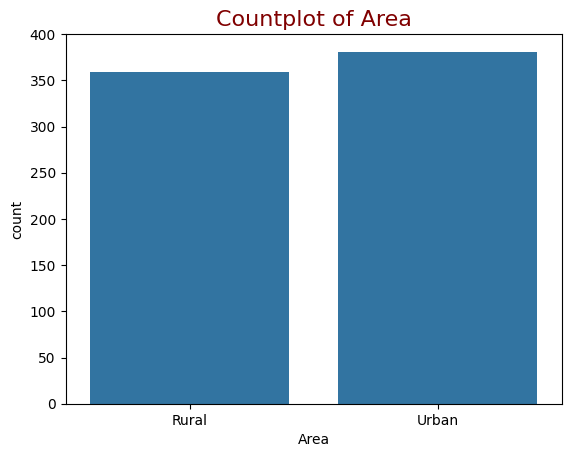

In [40]:
x = sns.countplot(data=df,x='Area')
plt.title("Countplot of Area",fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Maroon'})
plt.show()

In [42]:
df.Region.value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

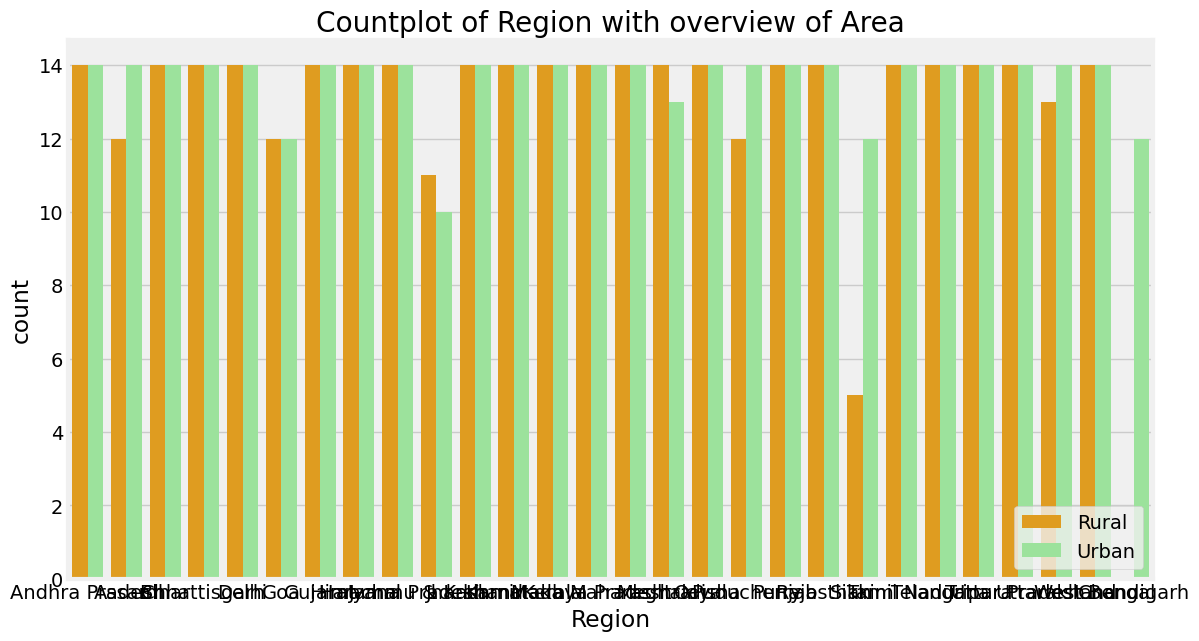

In [44]:
plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
ax = sns.countplot( x=df['Region'],hue = df['Area'], palette = ['orange','lightgreen'] )
plt.legend(loc = 'lower right')
plt.title('Countplot of Region with overview of Area')
plt.show()

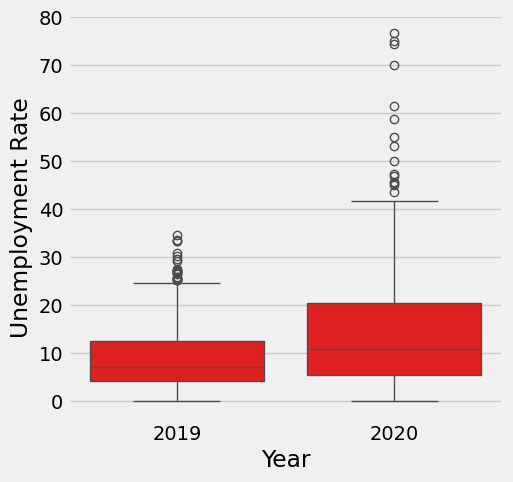

In [45]:
# BOXPLOT
plt.figure(figsize=(5,5))
sns.boxplot(y=df['Est_Unemp_Rate'],x=df['Year'],color='red')
plt.ylabel('Unemployment Rate')
plt.show()

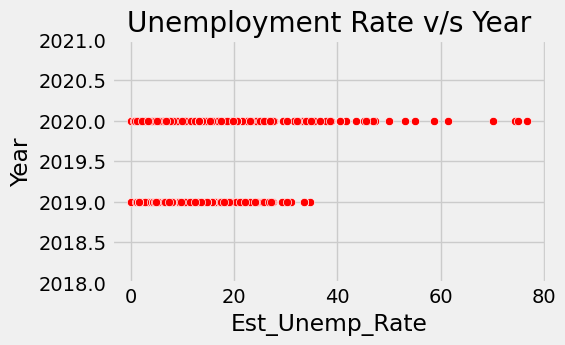

In [51]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=df['Est_Unemp_Rate'],y=df['Year'],color='red')
plt.title('Unemployment Rate v/s Year')
plt.ylim(2018,2021)
plt.show() 
# HERE 2020 YEAR HAS A RAPID INCREASE OF UNEMPLOYMENT RATE AFTER COVID

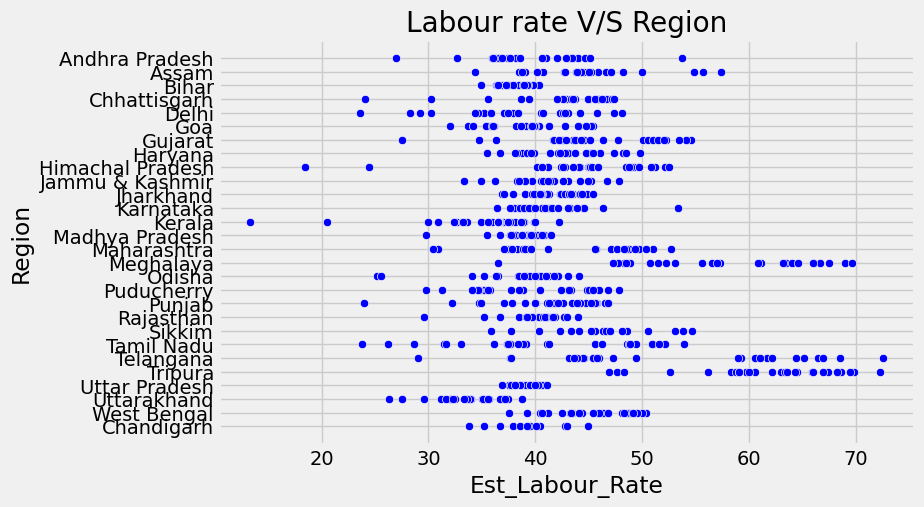

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Est_Labour_Rate'], y=df['Region'],color='blue')
plt.title('Labour rate V/S Region')
plt.show() # here meghalaya,tripura and telengana has rapid high of labour rate

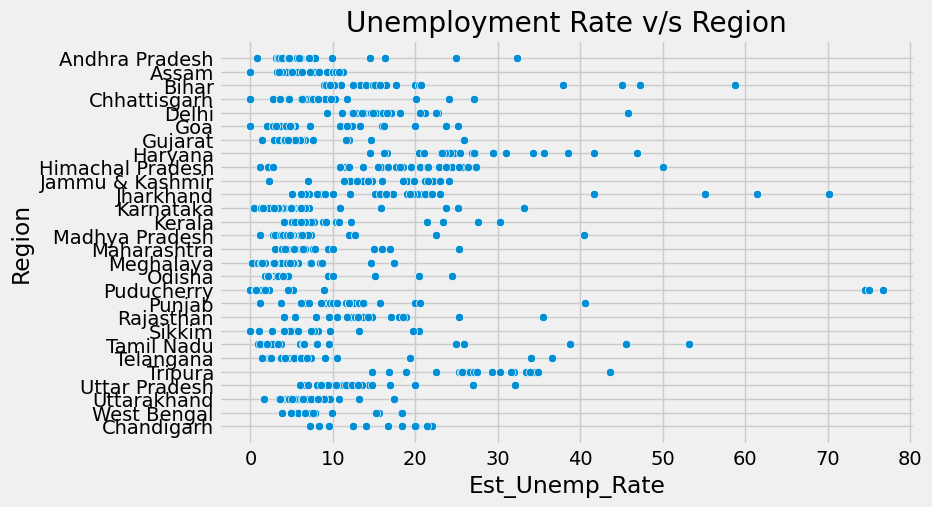

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Est_Unemp_Rate'],y=df['Region'],palette=('blue'))
plt.title('Unemployment Rate v/s Region')
plt.show()